In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [45]:
flights = pd.read_csv('Flight Delays/flights.csv', dtype=str)

0. Как соотносятся задержки вылета и прибытия самолётов?

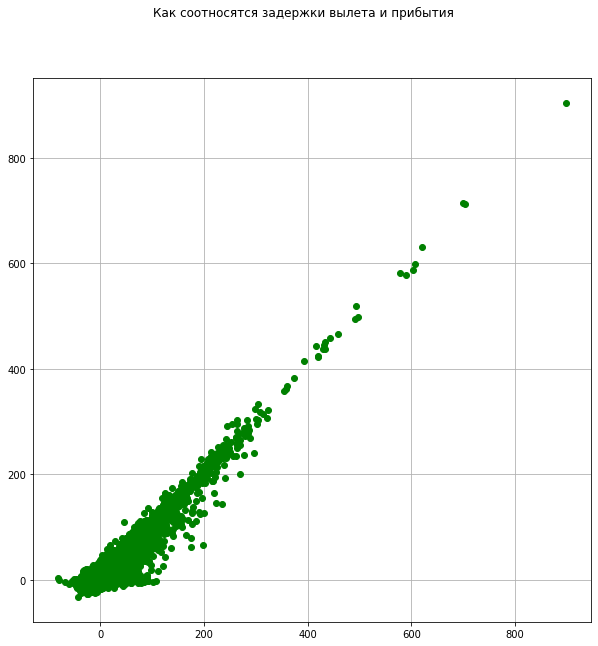

In [46]:
flights.DEPARTURE_DELAY = pd.to_numeric(flights["DEPARTURE_DELAY"])
flights.ARRIVAL_DELAY = pd.to_numeric(flights["ARRIVAL_DELAY"])

fig, axs = plt.subplots(1, 1, figsize = (10, 10))
fig.suptitle('Как соотносятся задержки вылета и прибытия')
flightsArr = flights['ARRIVAL_DELAY'][1:5000000:250]
flightsDep = flights['DEPARTURE_DELAY'][1:5000000:250]
axs.plot(flightsArr, flightsDep, 'go')

plt.grid()
plt.show()

Из графика видно, что многие точки лежат на значительном расстоянии от прямой x=y. Это свидетельствует о том, что задержки прибытия в большинстве случаев оказывались меньше задержек вылетов.
Вывод: нужно анализировать как задержки вылетов, так и задержки прибытия.


I. Зависимость от дня недели

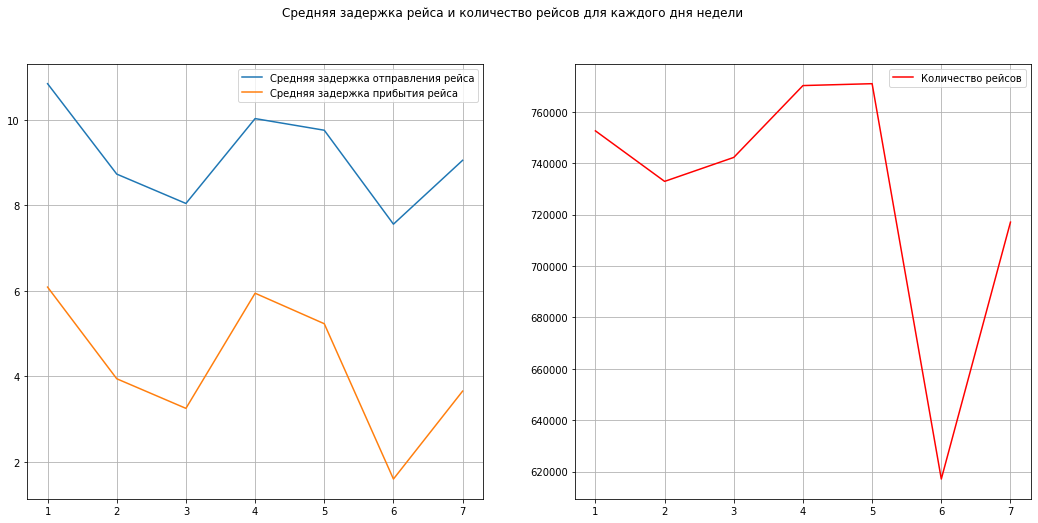

Коэффициент корреляции задержек и количества рейсов:
 0.7220327383536495


In [47]:
fig, axs = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Средняя задержка рейса и количество рейсов для каждого дня недели')
axs[0].plot(range(1, len(flights.groupby("DAY_OF_WEEK"))+1), flights.groupby("DAY_OF_WEEK")['DEPARTURE_DELAY'].mean(), label = "Средняя задержка отправления рейса")
axs[0].plot(range(1, len(flights.groupby("DAY_OF_WEEK"))+1), flights.groupby("DAY_OF_WEEK")['ARRIVAL_DELAY'].mean(), label = "Средняя задержка прибытия рейса")
axs[0].grid()
axs[0].legend()

axs[1].plot(range(1, len(flights.groupby("DAY_OF_WEEK"))+1), flights.groupby("DAY_OF_WEEK").size(), label = "Количество рейсов", color = "red")
axs[1].legend()
axs[1].grid()
plt.show()

print("Коэффициент корреляции задержек и количества рейсов:\n", np.corrcoef(flights.groupby("DAY_OF_WEEK")['DEPARTURE_DELAY'].mean(), flights.groupby("DAY_OF_WEEK").size())[0, 1])

1. Было логично ожидать высокий уровень корреляции количества вылетов и среднего времени задержки, поскольку с увеличением количество полётов увеличиваются и трудности в эффективном управлении ними. Но здесь корреляция не слишком высока и значительного уменьшения средней задержки не происходит даже при значительном уменьшении количества рейсов. Думаю, это говорит о том, что увеличение штата персонала, управляющего вылетами не исправит ситуацию и тот набор, что есть сейчас, в целом, оптимален.
2. Что же касается дней недели, то суббота пользуется наименьшей популярностью. Думаю, это объясняется тем, что в США, в основном, 5 дневная рабочая неделя. Суббота - слишком поздний день как для делового полёта, так и для туристического. В субботу же наблюдается наименьшая средняя задержка.
3. Примечательно, что задержка прибытия всегда меньше задержки вылета. Похоже, что пилоты пытаются хотя бы частично компенсировать задержку ценой увеличения скорости.

II. Зависимость от месяца

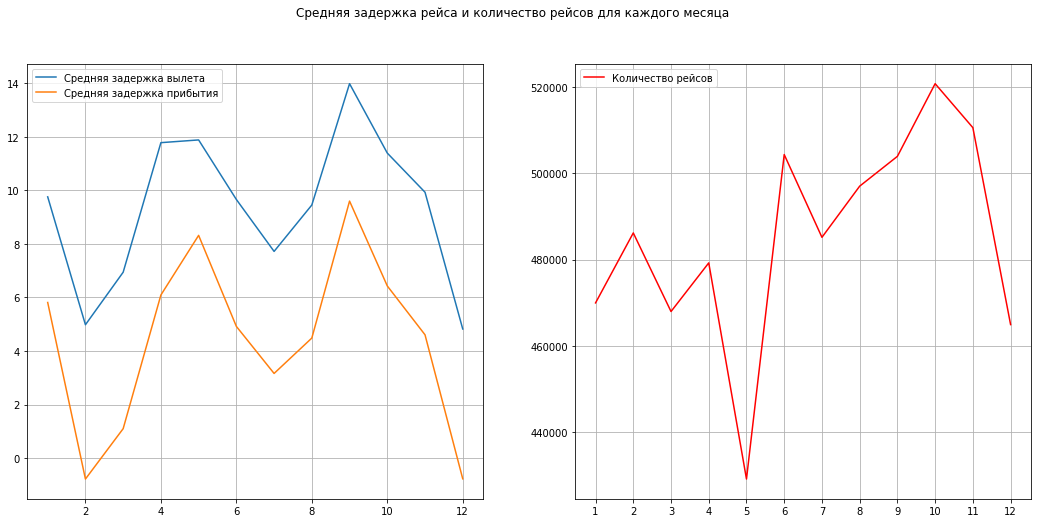

Коэффициент корреляции задержек и количества рейсов:
 0.19117786654621816


In [26]:

fig, axs = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Средняя задержка рейса и количество рейсов для каждого месяца')
axs[0].plot(range(1, len(flights.groupby("MONTH"))+1), flights.groupby("MONTH")['DEPARTURE_DELAY'].mean(), label = "Средняя задержка вылета")
axs[0].plot(range(1, len(flights.groupby("MONTH"))+1), flights.groupby("MONTH")['ARRIVAL_DELAY'].mean(), label = "Средняя задержка прибытия")
axs[0].grid()
axs[0].legend()
plt.xticks([1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

axs[1].plot(range(1, len(flights.groupby("MONTH"))+1), flights.groupby("MONTH").size(), label = "Количество рейсов", color = "red")
plt.xticks([1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.grid()
plt.show()
print("Коэффициент корреляции задержек и количества рейсов:\n", np.corrcoef(flights.groupby("MONTH")['DEPARTURE_DELAY'].mean(), flights.groupby("MONTH").size())[0, 1])

1. Самым непопулярным месяцем для полётов является май, в этот же месяц средняя задержка наиболее велика. Возможно, это является следствием попытки сэкономить за счёт уменьшения штата. 
2. Наиболее популярными месяцами являются осенние. Возможно, это следствие того, что некоторые знаковые для американцев праздники имеют место в этот период: день Колумба(2 пн октября), День благодарения (4 четверг ноября), Хеллоуин (30-31 октября). В прочем, этот вопрос требует отдельного изучения.

III. Зависимость от авиакомпании

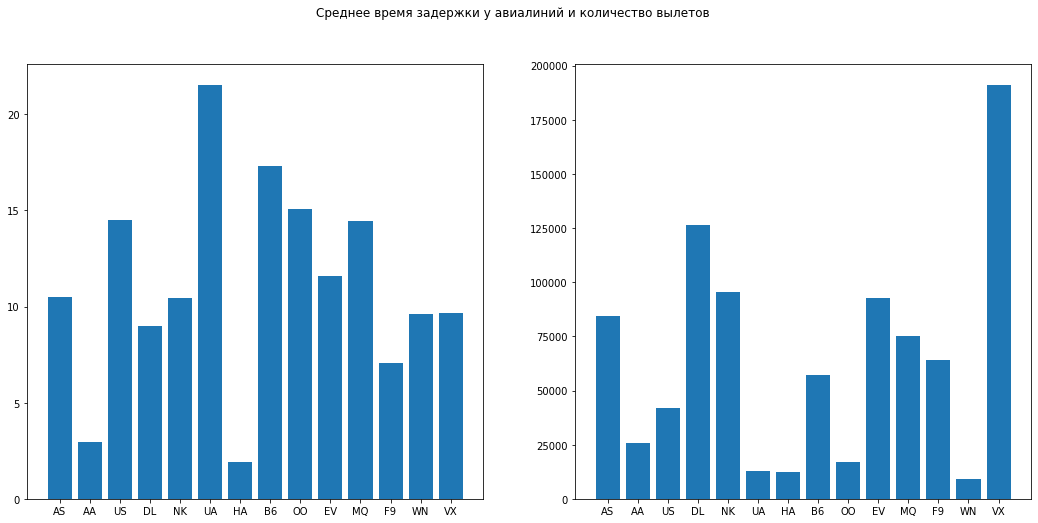

In [27]:
fig, axs = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Среднее время задержки у авиалиний и количество вылетов')
axs[0].bar(flights.AIRLINE.unique(), flights.groupby("AIRLINE")['DEPARTURE_DELAY'].mean())
axs[1].bar(flights.AIRLINE.unique(), flights.groupby("AIRLINE").size())
plt.show()

1. Некоторые компании добились огромных успехов в сокращении числа задержек(в том числе, самая крупная компания). Думаю, целесообразно отдельно исследовать их подход к организации полётов.

IV. Зависимость от расстояния до точки назначения

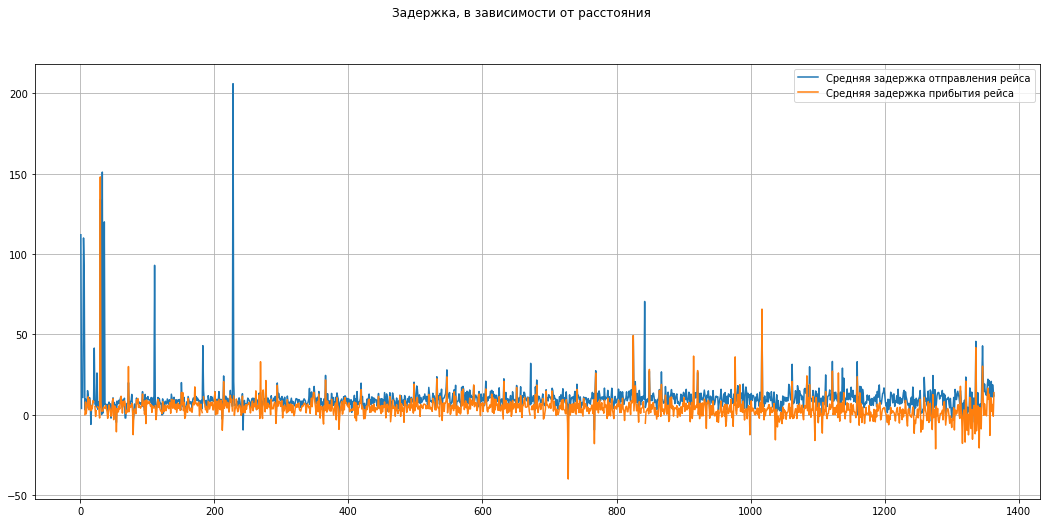

In [28]:
flights.DISTANCE = pd.to_numeric(flights["DISTANCE"])

fig, axs = plt.subplots(1, 1, figsize = (18, 8))
fig.suptitle('Задержка, в зависимости от расстояния')
axs.plot(range(1, len(flights.groupby("DISTANCE"))+1), flights.groupby("DISTANCE")['DEPARTURE_DELAY'].mean(), label = "Средняя задержка отправления рейса")
axs.plot(range(1, len(flights.groupby("DISTANCE"))+1), flights.groupby("DISTANCE")['ARRIVAL_DELAY'].mean(), label = "Средняя задержка прибытия рейса")

plt.legend()
plt.grid()
plt.show()

Расстояние никак не коррелирует с задержкой рейса, что, в общем, логично.